In [1]:
%run -n boillerplate.ipynb

# Figure 3 : Decoding Bthetas and thetas (96 labels)

# Confusion matrix

In [2]:
try:
    all_cms = np.load('./data/fig_3_BTT_cms.npy', allow_pickle = True)
    s_all_cms = np.load('./data/fig_3_BTT_s_cms.npy', allow_pickle = True)
    all_p_mats = np.load('./data/fig_3_BTT_pvals_cms.npy', allow_pickle = True)
    
except:
    all_cms = get_cm_kfold_btt(shuffled = False)
    s_all_cms = get_cm_kfold_btt(shuffled = True)
    all_p_mats = stats_cm_btt(all_cms, s_all_cms)
    np.save('./data/fig_3_BTT_cms.npy', all_cms)
    np.save('./data/fig_3_BTT_s_cms.npy', s_all_cms)
    np.save('./data/fig_3_BTT_pvals_cms.npy', all_p_mats)


<ipython-input-3-caee8d191cb5>:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(h_pad = 3., w_pad = 1.)


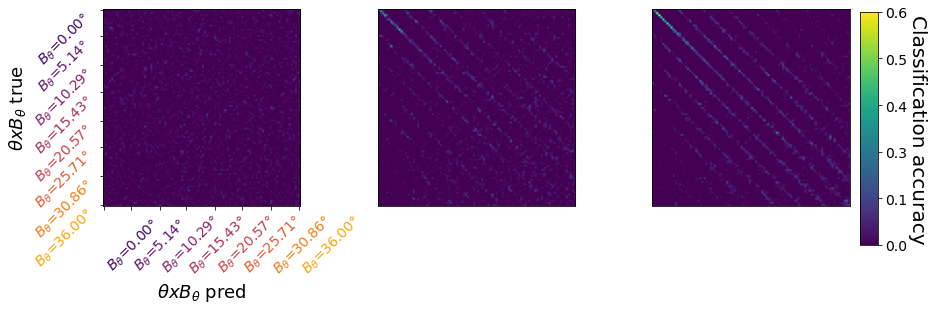

In [3]:
fig, axs = plt.subplots(figsize = (12,12), nrows = 1, ncols = 3)

for i, ax in enumerate(fig.axes) :
        
    cm = np.sum(all_cms[i])/all_cms[i].shape[0]
    #pvals = all_p_mats[i]
    ims = ax.imshow(cm, vmin = 1/96, vmax = .65, aspect = 'equal')
    #pval_edges(pvals < .05, ax = ax)

    if i == 0 :
        xticks = np.linspace(0, 95, 8, dtype = np.int16)
        ax.set_xticks(xticks)
        ax.set_yticks(xticks)

        labs = np.round(B_thetas[::-1]*180/np.pi, 2)
        labs = [r'$B_\theta$=%.2f°'%x for x in labs]
    
        ax.set_xticklabels(labs, fontsize = 11, rotation = 45, va = 'center', ha = 'left')
        ax.set_yticklabels(labs, fontsize = 11, rotation = 45, va = 'top', ha = 'center')

        for i1, _ in enumerate(B_thetas) :
            ax.get_xticklabels()[i1].set_color(colors[::-1][i1])

        for i1, _ in enumerate(B_thetas) :
            ax.get_yticklabels()[i1].set_color(colors[::-1][i1])

        ax.tick_params(axis='both', which='major', pad=35, labelsize = 14)
        
        ax.set_xlabel(r'$\theta x B_\theta$ pred', fontsize = 18)
        ax.set_ylabel(r'$\theta x B_\theta$ true', fontsize = 18)
    else :
        ax.set_xticks([])
        ax.set_yticks([])
    
    if i == 2 :
        cax = fig.add_axes([ax.get_position().x1+0.1, # offset from the right of the axis
                                ax.get_position().y0+-.048, #bottom of the colorbar
                                0.02, #width of the colorbar
                                .27]) #height of the colorbar
        cb = fig.colorbar(ims, cax = cax, ticks = np.linspace(1/96, 0.65, 6))
        cb.ax.set_yticklabels(np.round(np.linspace(1/96, .65, 6), 1))
        cb.ax.tick_params(labelsize = 14)
        cax.set_ylabel('Classification accuracy', rotation = 270, labelpad = 20,
                      fontsize = 20)
        
    ax.autoscale(False)
    ax.set_xlim(-.5, 95.5)
    ax.set_ylim(95.5, -.5)
    
fig.tight_layout(h_pad = 3., w_pad = 1.)

fig.savefig('./output/fig_3_BTT_confmats.pdf', bbox_inches='tight', dpi=200, transparent=True)

plt.show()

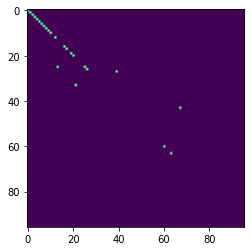

In [4]:
plt.imshow((cm > 1/96) & (all_p_mats[-1] < .05))

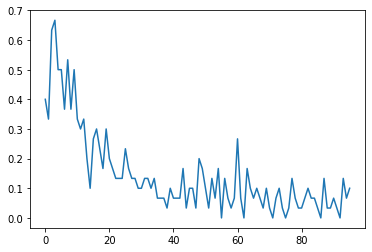

In [5]:
plt.plot(np.diag(cm))

In [6]:
for i, t in enumerate(cm_timesteps):
    p_mats = all_p_mats[i]
    signif = p_mats < .05
    n_diag = len(np.where(np.diag(signif) == True)[0])
    n_all = len(np.where(signif == True)[0])
    print('t = %.2fs, \t  signif diag = %s/%s' % (t,
                                          n_diag, 96))
print('\n')

t = -0.15s, 	  signif diag = 71/96
t = 0.00s, 	  signif diag = 29/96
t = 0.30s, 	  signif diag = 26/96




In [7]:
25/90

0.2777777777777778

In [8]:
for i, t in enumerate(cm_timesteps):
    cm = np.sum(all_cms[i])/all_cms[i].shape[0]
    signif = cm > 1/96
    n_diag = len(np.where(np.diag(signif) == True)[0])
    n_all = len(np.where(signif == True)[0])
    print('t = %.2fs, \t diag above chance level = %s/%s' % (t,
                                        n_diag, 96))
print('\n')

t = -0.15s, 	 diag above chance level = 25/96
t = 0.00s, 	 diag above chance level = 73/96
t = 0.30s, 	 diag above chance level = 90/96




### Showing an inset of the last CM because this is counterintuitive af

<ipython-input-9-51983b0acece>:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(h_pad = 3., w_pad = 1.)


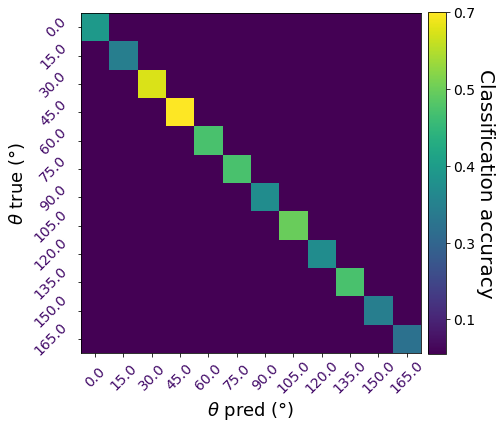

In [9]:
fig, ax = plt.subplots(figsize = (6,6), nrows = 1, ncols = 1)

cm = np.sum(all_cms[-1])/all_cms[-1].shape[0]
cm = cm[0:12, 0:12]
ims = ax.imshow(cm, vmin = 1/12, vmax = np.max(cm), aspect = 'equal')


ax.set_xlabel(r'$\theta$ pred (°)', fontsize = 18)
ax.set_ylabel(r'$\theta$ true (°)', fontsize = 18)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xticks(np.arange(0, 12))
ax.set_yticks(np.arange(0, 12))
ax.set_xticklabels(np.round(thetas*180/np.pi,1), rotation = 45, va = 'center')
ax.set_yticklabels(np.round(thetas*180/np.pi,1), rotation = 45, va = 'center')

for i1, _ in enumerate(thetas) :
    ax.get_xticklabels()[i1].set_color(colors[::-1][0])

for i1, _ in enumerate(thetas) :
    ax.get_yticklabels()[i1].set_color(colors[::-1][0])

ax.tick_params(axis='both', which='major', pad=8, labelsize = 14)
ax.tick_params(axis='x', which='major', pad=20, labelsize = 14)


cax = fig.add_axes([ax.get_position().x1+0.1, # offset from the right of the axis
                        ax.get_position().y0+.06, #bottom of the colorbar
                        0.04, #width of the colorbar
                        .79]) #height of the colorbar
cb = fig.colorbar(ims, cax = cax, ticks = np.linspace(1/96, np.max(cm), 6))
cb.ax.set_yticklabels(np.round(np.linspace(1/96, np.max(cm), 6), 1))
cb.ax.tick_params(labelsize = 14)
cax.set_ylabel('Classification accuracy', rotation = 270, labelpad = 20,
              fontsize = 20)

    
fig.tight_layout(h_pad = 3., w_pad = 1.)

fig.savefig('./output/fig_3_inset.pdf', bbox_inches='tight', dpi=200, transparent=True)

plt.show()

In [10]:
for i, t in enumerate(cm_timesteps):
    cm = np.sum(all_cms[i])/all_cms[i].shape[0]
    signif = cm > 1/(N_thetas*N_B_thetas)
    n_diag = len(np.where(np.diag(signif) == True)[0])
    n_all = len(np.where(signif == True)[0])
    print('t = %.2fs, \t %s / %s above chance level (diag above chance level = %s/%s)' % (t,
                                         n_all , (N_thetas*N_B_thetas)**2, n_diag, N_thetas*N_B_thetas))
print('\n')

t = -0.15s, 	 2516 / 9216 above chance level (diag above chance level = 25/96)
t = 0.00s, 	 2108 / 9216 above chance level (diag above chance level = 73/96)
t = 0.30s, 	 1718 / 9216 above chance level (diag above chance level = 90/96)




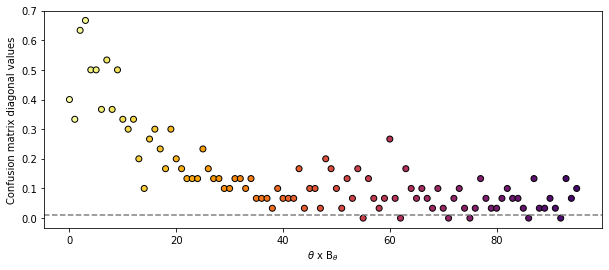

In [11]:
xs = np.arange(0, 96)
ys = np.diagonal(cm)

colors = plt.cm.inferno(np.linspace(1, .2, (N_thetas*N_B_thetas)))
#colors = np.repeat(colors, 12, axis = 0)[::-1]

#slope, intercept, rvalue, pvalue, stderr = stats.linregress(xs, ys)
#r, pval = stats.spearmanr(xs, ys)

fig, ax = plt.subplots(figsize = (10, 4))

#xplot = np.linspace(0, len(list(le.classes_)), 300)
ax.scatter(xs, ys, facecolors = colors, edgecolors = 'k',
          label = 'Données')
#ax.plot(xplot, intercept + slope * xplot, c = 'b', linestyle = '--')

ax.axhline(1/(N_thetas*N_B_thetas), linestyle = '--', c = 'gray')
ax.set_xlabel(r'$\theta$ x B$_\theta$')
ax.set_ylabel('Confusion matrix diagonal values')
#ax.set_title('Spearman R = %.3f, p = %.3f' % (r, pval))

plt.show()

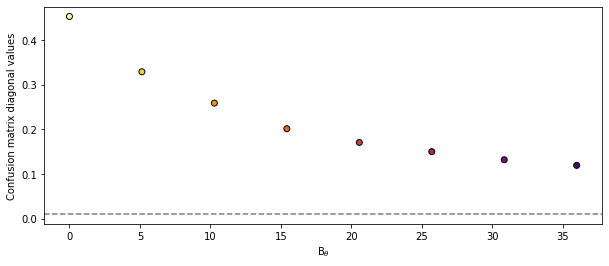

In [12]:
xs = np.arange(0, len(B_thetas))
diag = np.diagonal(cm)
ys = []
for i in range(len(B_thetas)) :
    ys.append(np.mean(diag[i: (i+1) * len(thetas)]))
    
colors = plt.cm.inferno(np.linspace(1, .2, len(ys)))
#colors = np.repeat(colors, 12, axis = 0)[::-1]

#slope, intercept, rvalue, pvalue, stderr = stats.linregress(xs, ys)
#r, pval = stats.spearmanr(xs, ys)

fig, ax = plt.subplots(figsize = (10, 4))

#xplot = np.linspace(0, len(list(le.classes_)), 300)
ax.scatter((B_thetas *  180 / np.pi)[::-1], ys, facecolors = colors, edgecolors = 'k',
          label = 'Données')
#ax.plot(xplot, intercept + slope * xplot, c = 'b', linestyle = '--')

#ax.axhline(1/len(le.classes_), linestyle = '--', c = 'gray')
ax.set_xlabel(r'B$_\theta$')
ax.set_ylabel('Confusion matrix diagonal values')
#ax.set_title('Spearman R = %.3f, p = %.3f' % (r, pval))
ax.axhline(1/(N_thetas*N_B_thetas), linestyle = '--', c = 'gray')
plt.show()

# Temporal evolution

In [13]:
try:
    accs = np.load('./data/fig_3_BTT_all_accs.npy')
    
except:
    # Data
    data, labels, le = par_load_temporal_data(timesteps = timesteps, target_btheta = None,
                                            target_theta = None, data_type = 'all_t_bt',
                                            cluster_list = cluster_list)

    # Classifying
    logreg = LogisticRegression(**opts_LR)

    accs = []
    for ibin in tqdm(range(data.shape[0]), desc='Decoding') :
        xtrain, xtest, ytrain, ytest = train_test_split(data[ibin,:,:], labels, test_size=test_size, random_state = 42)
        
        logreg.fit(xtrain, ytrain)
        
        accs.append(metrics.balanced_accuracy_score(ytest, logreg.predict(xtest)))

    np.save('./data/fig_3_BTT_all_accs.npy', accs)
    


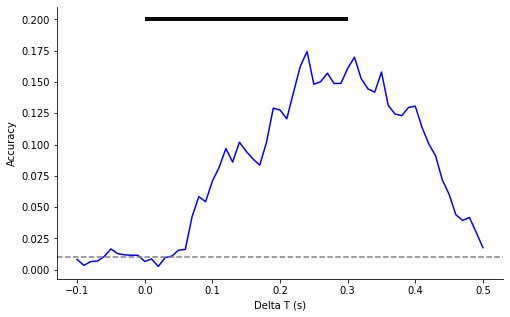

In [14]:
fig, ax = plt.subplots(figsize = (8,5))

plot_data = np.asarray(accs)
ax.plot(timesteps + win_size, plot_data, color = 'b')
    
ax.hlines(.2, 0., .3, color = 'k', linewidth = 4)
ax.axhline(1/(N_thetas*N_B_thetas), c = 'gray', linestyle = '--')

ax.set_xlabel('Delta T (s)')
ax.set_ylabel('Accuracy')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

# K-fold

In [15]:
try:
    kfold_scores = np.load('./data/fig_3_BTT_all_kfold.npy')
    
except:
    # Classifying
    logreg = LogisticRegression(**opts_LR)

    kfold_scores = []
    for ibin in tqdm(range(data.shape[0]), desc='Decoding with K-fold') :
        scores = cross_val_score(logreg, data[ibin,:,:], labels, 
                                 cv = n_splits, scoring = 'balanced_accuracy')
        kfold_scores.append(scores)

    np.save('./data/fig_3_BTT_all_kfold.npy', kfold_scores)
    


<ipython-input-16-0fe401e89416>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels((labs*100).astype(np.int16))


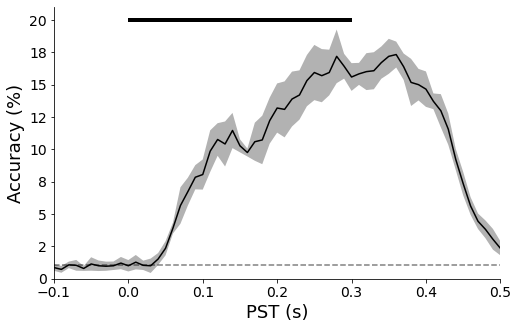

In [16]:
fig, ax = plt.subplots(figsize = (8,5))

kfold_means = np.asarray([x.mean() for x in kfold_scores])
kfold_stderr = np.asarray([x.std() for x in kfold_scores])

ax.plot(timesteps + win_size, kfold_means, color = 'k')
ax.fill_between(timesteps + win_size,
                kfold_means + kfold_stderr, kfold_means - kfold_stderr,
                facecolor = 'k', alpha = .3, edgecolor = None)
    

ax.hlines(.2, 0., .3, color = 'k', linewidth = 4)
ax.axhline(1/(N_thetas*N_B_thetas), c = 'gray', linestyle = '--', zorder = -1)

ax.set_xlabel('PST (s)', fontsize = 18)
ax.set_ylabel('Accuracy (%)', fontsize = 18)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlim(timesteps[0]+win_size, timesteps[-1]+win_size)
ax.set_ylim(0., .21)

ax.tick_params(axis='both', which='major', labelsize=14)
labs = np.round(ax.get_yticks().tolist(),2)
ax.set_yticklabels((labs*100).astype(np.int16))

fig.savefig('./output/fig_3_BTT_decoder_timecourse.pdf', bbox_inches='tight', dpi=200, transparent=True)

plt.show()

In [17]:
np.max(kfold_means)

0.17326388888888888

In [18]:
timesteps[np.argmax(kfold_means)]+win_size

0.36000000000000043

# Optim : Window size

In [19]:
try:
    max_acc = np.load('./data/sup_5_BTT_opt_wsize.npy')
    
except:

    max_acc = []
    for win_size_ in win_sizes :
        data, labels, le = par_load_temporal_data(timesteps = timesteps, target_btheta = None,
                                            target_theta = None, data_type = 'all_t_bt',
                                            cluster_list = cluster_list, win_size=win_size_)

        accs = []
        for ibin in range(data.shape[0]) :
            logreg = LogisticRegression(**opts_LR)
            xtrain, xtest, ytrain, ytest = train_test_split(data[ibin,:,:], labels, 
                                                            test_size=test_size, random_state = 42)
            logreg.fit(xtrain, ytrain)

            accs.append(metrics.balanced_accuracy_score(ytest, logreg.predict(xtest)))

        max_acc.append(np.max(accs))

    np.save('./data/sup_5_BTT_opt_wsize.npy', max_acc)


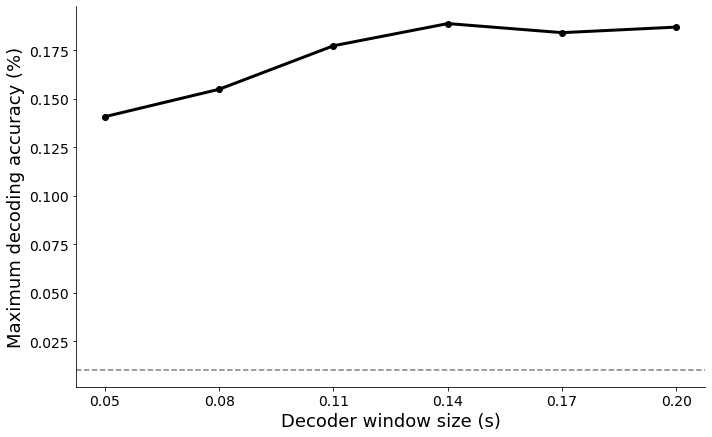

In [20]:
fig, ax = plt.subplots(figsize = (1.61 * 7, 7))

ax.plot(win_sizes, max_acc, c = 'k', linewidth = 3, marker = 'o')
ax.axhline(1/96, c = 'gray', linestyle = '--')

ax.set_xlabel('Decoder window size (s)', fontsize = 18)
ax.set_ylabel('Maximum decoding accuracy (%)', fontsize = 18)

ax.set_xticks(win_sizes)
'''ax.set_yticks(np.linspace(np.min(max_acc), np.max(max_acc), 6))
ax.set_yticklabels(np.round(np.linspace(np.min(max_acc), np.max(max_acc), 6) * 100,2))'''
ax.tick_params(axis='both', which='major', labelsize=14)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.savefig('./output/sup_5_BTT_win_size.pdf', bbox_inches='tight', dpi=200, transparent=True)

plt.show()

# Optim : Penalty (L1,L2,mix(elasticnet))

In [21]:
    
try:
    max_acc = np.load('./data/sup_5_BTT_opt_penalty.npy')
    
except:
    
    data, labels, le = par_load_temporal_data(timesteps = timesteps, target_btheta = None,
                                             target_theta = None, data_type = 'all_t_bt',
                                             cluster_list = cluster_list)

    max_acc = []
    for penalty in ['l1', 'l2', 'elasticnet']:

        accs = []
        for ibin in tqdm(range(data.shape[0])) :
            logreg = LogisticRegression(solver = 'lbfgs' if penalty == 'l2' else 'saga', 
                                        l1_ratio = .5 if penalty == 'elasticnet' else None,
                                       **opts_LR)
            xtrain, xtest, ytrain, ytest = train_test_split(data[ibin,:,:], labels, test_size=test_size, random_state = 42)
            logreg.fit(xtrain, ytrain)

            accs.append(metrics.balanced_accuracy_score(ytest, logreg.predict(xtest)))

        max_acc.append(np.max(accs))

    np.save('./data/sup_5_BTT_opt_penalty.npy', max_acc)


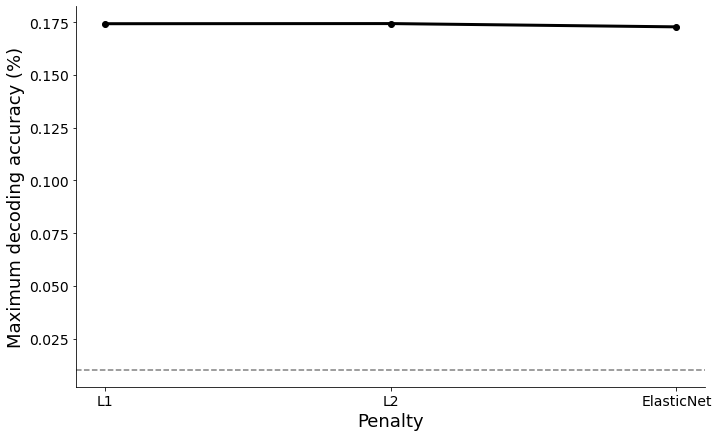

In [22]:
fig, ax = plt.subplots(figsize = (1.61 * 7, 7))

ax.plot(np.arange(0, 3, 1), max_acc, c = 'k', linewidth = 3, marker = 'o')
ax.axhline(1/96, c = 'gray', linestyle = '--')

ax.set_xlabel('Penalty', fontsize = 18)
ax.set_ylabel('Maximum decoding accuracy (%)', fontsize = 18)

ax.set_xticks(np.arange(0, 3, 1))
ax.set_xticklabels(['L1', 'L2', 'ElasticNet'])

'''ax.set_yticks(np.linspace(np.min(max_acc), np.max(max_acc), 6))
ax.set_yticklabels(np.round(np.linspace(np.min(max_acc), np.max(max_acc), 6) * 100,2))'''

ax.tick_params(axis='both', which='major', labelsize=14)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.savefig('./output/sup_5_BTT_penalty.pdf', bbox_inches='tight', dpi=200, transparent=True)

plt.show()

# Optim : C = 1/$\lambda$ (.01 to 10)

In [23]:
try:
    max_acc = np.load('./data/sup_5_BTT_opt_C.npy')
    
except:
    
    data, labels, le = par_load_temporal_data(timesteps = timesteps, target_btheta = None,
                                            target_theta = None, data_type = 'all_t_bt',
                                            cluster_list = cluster_list)

    max_acc = []
    for C_ in Cs:
        opts_LR_ = opts_LR.copy()
        opts_LR_.update(C = C_)

        accs = []
        for ibin in range(data.shape[0]) :
            logreg = LogisticRegression(**opts_LR_)
            xtrain, xtest, ytrain, ytest = train_test_split(data[ibin,:,:], labels, 
                                                            test_size=test_size, random_state = 42)
            logreg.fit(xtrain, ytrain)

            accs.append(metrics.balanced_accuracy_score(ytest, logreg.predict(xtest)))

        max_acc.append(np.max(accs))

    np.save('./data/sup_5_BTT_opt_C.npy', max_acc)


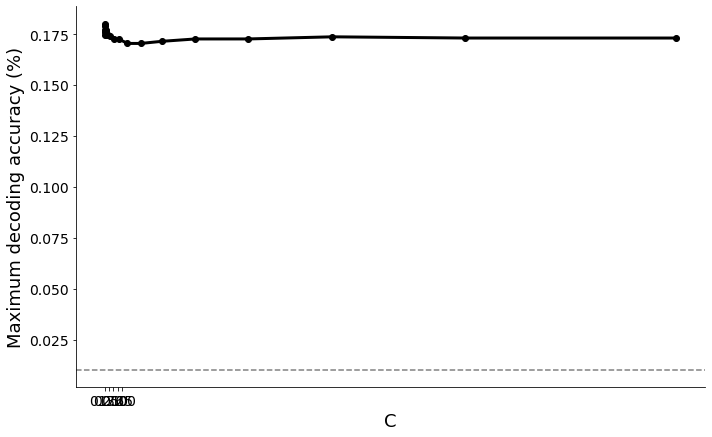

In [24]:
fig, ax = plt.subplots(figsize = (1.61 * 7, 7))

ax.plot(Cs, max_acc, c = 'k', linewidth = 3, marker = 'o')
ax.axhline(1/96, c = 'gray', linestyle = '--')

ax.set_xlabel('C', fontsize = 18)
ax.set_ylabel('Maximum decoding accuracy (%)', fontsize = 18)

ax.set_xticks(np.round(np.linspace(.01, 3, 5),2))

'''ax.set_yticks(np.linspace(np.min(max_acc), np.max(max_acc), 6))
ax.set_yticklabels(np.round(np.linspace(np.min(max_acc), np.max(max_acc), 6) * 100,2))'''

ax.tick_params(axis='both', which='major', labelsize=14)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.savefig('./output/sup_5_BTT_C.pdf', bbox_inches='tight', dpi=200, transparent=True)

plt.show()

# Optim : Train/test size (.15, .5)

In [25]:
try:
    max_acc = np.load('./data/sup_5_BTT_opt_size.npy')

except:    
    data, labels, le = par_load_temporal_data(timesteps = timesteps, target_btheta = None,
                                            target_theta = None, data_type = 'all_t_bt',
                                            cluster_list = cluster_list)

    max_acc = []
    for test_size_ in np.linspace(.15, .5, 6):

        accs = []
        for ibin in tqdm(range(data.shape[0])) :
            logreg = LogisticRegression(**opts_LR)
            xtrain, xtest, ytrain, ytest = train_test_split(data[ibin,:,:], labels, test_size=test_size_, random_state = 42,
                                                           stratify = labels)
            logreg.fit(xtrain, ytrain)

            accs.append(metrics.balanced_accuracy_score(ytest, logreg.predict(xtest)))

        max_acc.append(np.max(accs))

    np.save('./data/sup_5_BTT_opt_size.npy', max_acc)
    


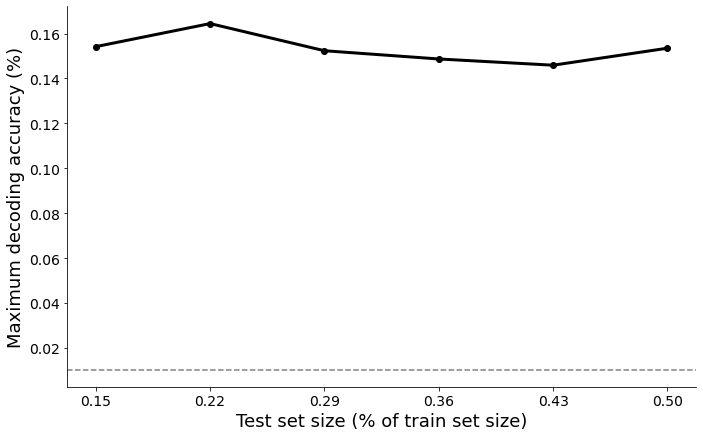

In [26]:
fig, ax = plt.subplots(figsize = (1.61 * 7, 7))

ax.plot(np.linspace(.15, .5, 6), max_acc, c = 'k', linewidth = 3, marker = 'o')
ax.axhline(1/96, c = 'gray', linestyle = '--')

ax.set_xlabel('Test set size (% of train set size)', fontsize = 18)
ax.set_ylabel('Maximum decoding accuracy (%)', fontsize = 18)

ax.set_xticks(np.round(np.linspace(.15, .5, 6),2))

'''ax.set_yticks(np.linspace(np.min(max_acc), np.max(max_acc), 6))
ax.set_yticklabels(np.round(np.linspace(np.min(max_acc), np.max(max_acc), 6) * 100,2))'''

ax.tick_params(axis='both', which='major', labelsize=14)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.savefig('./output/sup_5_BTT_size.pdf', bbox_inches='tight', dpi=200, transparent=True)

plt.show()